In [13]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2 # set the value globally
import seaborn as sns

This data was obtained from : http://kaggle.com/mlomuscio/sleepstudypilot

Data collected from a survey-based study of the sleeping habits of individuals within the US. This data was conducted as a pilot study to determine whether or not students were satisfied with the survey.

Here is a description of each of the variables contained within the dataset.

Enough = Do you think that you get enough sleep?

Hours = On average, how many hours of sleep do you get on a weeknight?

PhoneReach = Do you sleep with your phone within arms reach?

PhoneTime = Do you use your phone within 30 minutes of falling asleep?

Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)

Breakfast = Do you typically eat breakfast?

In [31]:
df = pd.read_csv('SleepStudyData.csv')
df.head()
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


First we will explore whether there is a descrepency between the two types of answers. (Whether they get enough sleep and hours they slept)

<AxesSubplot:xlabel='Enough', ylabel='Hours'>

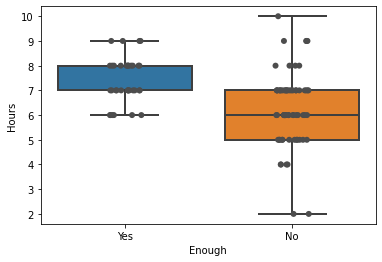

In [25]:
sns.boxplot(x = 'Enough',y = 'Hours',data=df)
sns.stripplot(x="Enough", y="Hours", data=df,
              size=6, color=".3", linewidth=0)


On average, those who slept enough slept for ~2 hour more than those who reported not sleeping well!
There is less variability in the group that said sleeping well as compared to group that reported not sleeping well. Next we will check if there is a relationship between feeling tired and sleep hours

Text(0.5, 0, 'Intensity of Tiredness')

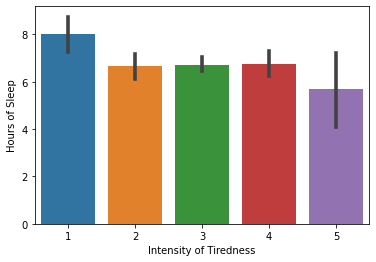

In [22]:
sns.barplot(x = 'Tired',y='Hours',data=df)
plt.ylabel('Hours of Sleep')
plt.xlabel('Intensity of Tiredness')

Those who felt least tired slept longer, those who felt most tired slept on average ~ 6 hrs,
Let's see relationship between phone use and sleep sufficiency.

In [44]:
pp_df = df.copy()
pp_df.Enough = pp_df.Enough.eq('Yes').mul(1)
pp_df.PhoneReach = pp_df.PhoneReach.eq('Yes').mul(1)
pp_df.PhoneTime = pp_df.PhoneTime.eq('Yes').mul(1)
pp_df.Breakfast = pp_df.Breakfast.eq('Yes').mul(1)
                                        

Text(0.5, 1.0, 'Sleep Hours by Phone Reach Preference')

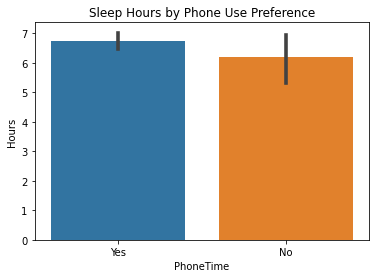

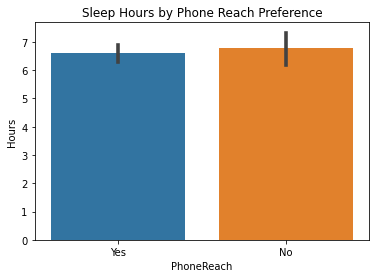

In [53]:
sns.barplot(x = 'PhoneTime',y='Hours',data=df)
plt.title('Sleep Hours by Phone Use Preference')
plt.figure()
sns.barplot(x='PhoneReach',y='Hours',data=df)
plt.title('Sleep Hours by Phone Reach Preference')


Looks like there is hardly any difference of total sleep time between those who use phone and those who don't. Those who don't use phone sleep slightly less in fact.


Text(0.5, 1.0, 'Phone Time ')

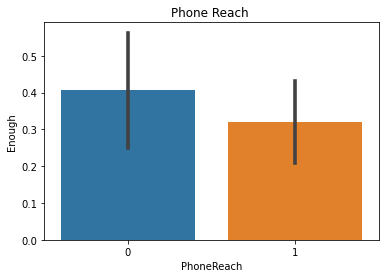

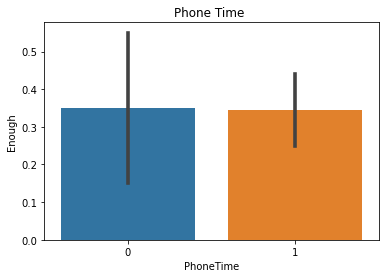

In [63]:
sns.barplot(x='PhoneReach',y='Enough',data = pp_df)
plt.title('Phone Reach ')
plt.figure()

sns.barplot(x='PhoneTime',y='Enough',data=pp_df)
plt.title('Phone Time ')


Those who sleep close to Phone are less likely to say that they had enough sleep as compared to those who sleep away from phone, but no correlation to phone use within 30 mins of sleep.

Now let's look at breakfast, those who feel LESS TIRED are more likely to have breakfast.

Text(0.5, 0, 'Tiredness Score')

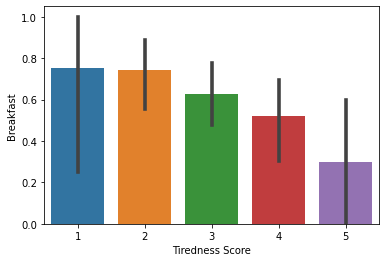

In [91]:
sns.barplot(x='Tired',y='Breakfast',data = pp_df)
plt.xlabel('Tiredness Score')

<AxesSubplot:xlabel='PhoneReach', ylabel='Tired'>

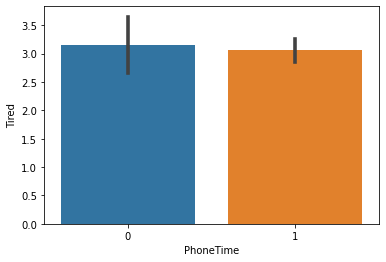

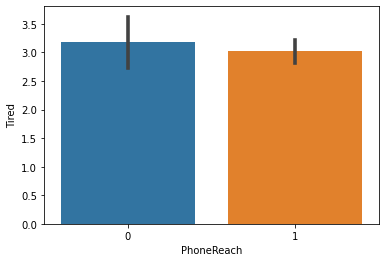

In [72]:
sns.barplot(x='PhoneTime',y='Tired',data = pp_df)
plt.figure()
sns.barplot(x='PhoneReach',y='Tired',data = pp_df)


Again, no difference between tiredness and phone use, Looks like There is a ceiling effect in phone use, i.e. most of the participants use phone before sleepig.

In [80]:
df.describe(include='all'), 

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
count,104,102.000000,104,104,104.000000,104
unique,2,NaN,2,2,NaN,2
top,No,NaN,Yes,Yes,NaN,Yes
freq,68,NaN,72,84,NaN,63
mean,NaN,6.656863,NaN,NaN,3.076923,NaN
std,NaN,1.417676,NaN,NaN,1.011510,NaN
min,NaN,2.000000,NaN,NaN,1.000000,NaN
25%,NaN,6.000000,NaN,NaN,2.000000,NaN
50%,NaN,7.000000,NaN,NaN,3.000000,NaN
75%,NaN,7.000000,NaN,NaN,4.000000,NaN


Finally, is there a relationship between having breakfast and using phone in the night?


<AxesSubplot:xlabel='PhoneReach', ylabel='Breakfast'>

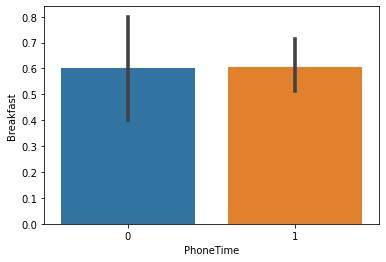

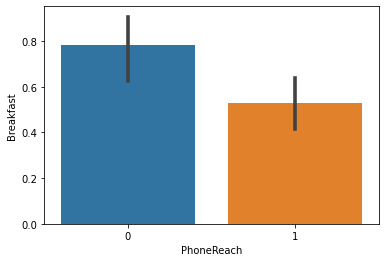

In [81]:
sns.barplot(x='PhoneTime',y='Breakfast',data = pp_df)
plt.figure()
sns.barplot(x='PhoneReach',y='Breakfast',data = pp_df)



Wow, there is no effect of using phone in the last 30 mins, but there is a clear effect of whether phone is in arm's reach.

People who don't keep phones close to them are more likely to have breakfast than those who don't.

So there is a correlation between Phone Reach and Having breakfast, there is also a correlation between having breakfast and feeling tired, but no direct correlation between having phone in arm's reach and feeling tired!




Let's do some stats now

In [84]:
import scipy.stats as spstats

In [87]:
usephone =  pp_df[pp_df['PhoneReach'] == 1]['Breakfast']
dontusephone = pp_df[pp_df['PhoneReach'] == 0]['Breakfast']
spstats.ttest_ind(usephone, dontusephone)    # As expected this difference is significant.


Ttest_indResult(statistic=-2.4901453062370433, pvalue=0.014384278169257794)

In [90]:
tired_usephone = pp_df[pp_df['PhoneReach']==1]['Tired']
tired_dontusephone = pp_df[pp_df['PhoneReach'] == 0]['Tired']
spstats.ttest_ind(tired_usephone, tired_dontusephone)    # This relationship is not significant.


Ttest_indResult(statistic=-0.7415988894018628, pvalue=0.46003451514678984)